<a href="https://colab.research.google.com/github/mauroamnirati/challenge-alura-store/blob/main/challenge_alura_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
ingreso_1 = tienda1["Precio"].sum()
ingreso_2 = tienda2["Precio"].sum()
ingreso_3 = tienda3["Precio"].sum()
ingreso_4 = tienda4["Precio"].sum()

In [3]:
print(f"Ingreso total de la tienda 1: ${ingreso_1}")
print(f"Ingreso total de la tienda 2: ${ingreso_2}")
print(f"Ingreso total de la tienda 3: ${ingreso_3}")
print(f"Ingreso total de la tienda 4: ${ingreso_4}")

Ingreso total de la tienda 1: $1150880400.0
Ingreso total de la tienda 2: $1116343500.0
Ingreso total de la tienda 3: $1098019600.0
Ingreso total de la tienda 4: $1038375700.0


In [36]:
datos_ingresos_totales = pd.DataFrame(ingresos_millones, tiendas)
datos_ingresos_totales.rename(columns={0:"Ingreso en millones"}, inplace=True)
datos_ingresos_totales

,Ingreso en millones
Tienda 1,1150.8804
Tienda 2,1116.3435
Tienda 3,1098.0196
Tienda 4,1038.3757


# 2. Ventas por categoría

In [19]:
ventas_categoria_1 = tienda1.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
ventas_categoria_2 = tienda2.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
ventas_categoria_3 = tienda3.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
ventas_categoria_4 = tienda4.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
datos_ventas_categoria = pd.DataFrame({"Tienda 1": ventas_categoria_1,
                                       "Tienda 2": ventas_categoria_2,
                                       "Tienda 3": ventas_categoria_3,
                                       "Tienda 4": ventas_categoria_4
                                       })
datos_ventas_categoria

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


# 3. Calificación promedio de la tienda


In [5]:
calificacion_1 = tienda1["Calificación"].mean()
calificacion_2 = tienda2["Calificación"].mean()
calificacion_3 = tienda3["Calificación"].mean()
calificacion_4 = tienda4["Calificación"].mean()

In [53]:
calificaciones_promedio = [calificacion_1, calificacion_2, calificacion_3, calificacion_4]
datos_calificacion_promedio = pd.DataFrame(calificaciones_promedio, tiendas)
datos_calificacion_promedio.rename(columns={0:"Calificación promedio"}, inplace=True)
datos_calificacion_promedio.sort_values(by="Calificación promedio")

,Calificación promedio
Tienda 1,3.976685
Tienda 4,3.995759
Tienda 2,4.037304
Tienda 3,4.048326


# 4. Productos más y menos vendidos

In [73]:
productos_1 = tienda1.groupby("Producto")["Producto"].count().sort_values(ascending=False)
productos_2 = tienda2.groupby("Producto")["Producto"].count().sort_values(ascending=False)
productos_3 = tienda3.groupby("Producto")["Producto"].count().sort_values(ascending=False)
productos_4 = tienda4.groupby("Producto")["Producto"].count().sort_values(ascending=False)

productos = pd.concat([productos_1, productos_2, productos_3, productos_4], axis=1)
productos.columns = tiendas

productos

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Producto,,,,
Armario,60,54,49,34
TV LED UHD 4K,60,45,42,40
Microondas,60,62,36,48
Secadora de ropa,58,57,45,40
Mesa de noche,56,44,55,55
Bloques de construcción,56,54,35,54
Balón de baloncesto,55,42,50,50
Bicicleta,54,45,52,45
Impresora,54,34,50,50


# 5. Envío promedio por tienda

In [14]:
envios_1 = tienda1["Costo de envío"].mean()
envios_2 = tienda2["Costo de envío"].mean()
envios_3 = tienda3["Costo de envío"].mean()
envios_4 = tienda4["Costo de envío"].mean()

In [50]:
envios_promedio = [envios_1, envios_2, envios_3, envios_4]
datos_envios_promedio = pd.DataFrame(envios_promedio, tiendas)
datos_envios_promedio.rename(columns={0:"Envio promedio"}, inplace=True)
datos_envios_promedio.sort_values(by="Envio promedio")

,Envio promedio
Tienda 4,23459.457167
Tienda 3,24805.680373
Tienda 2,25216.235693
Tienda 1,26018.609580


# Visualización

## Ingresos totales por tienda

In [8]:
import matplotlib.pyplot as plt

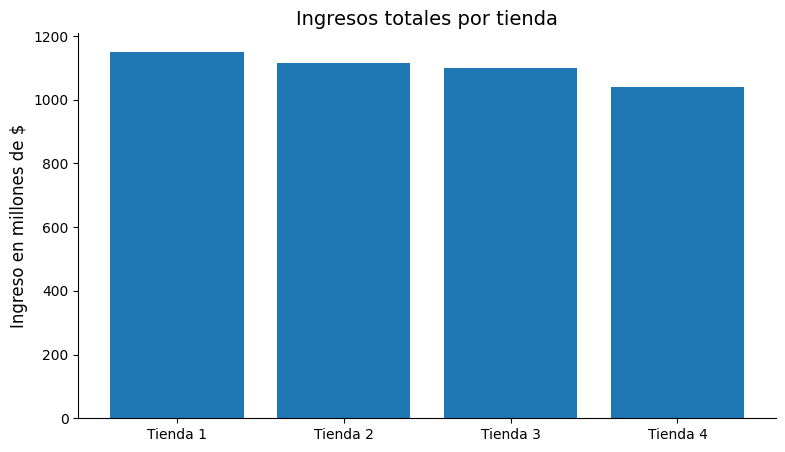

In [9]:
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos = [ingreso_1, ingreso_2, ingreso_3, ingreso_4]
ingresos_millones = [i / 1000000 for i in ingresos]

fig, ax = plt.subplots(figsize=(9,5))
ax.bar(tiendas, ingresos_millones)
ax.set_title("Ingresos totales por tienda", fontsize=14)
ax.set_ylabel("Ingreso en millones de $", fontsize=12)
ax.spines[["top","right"]].set_visible(False)

plt.show()

## Ventas por categoría

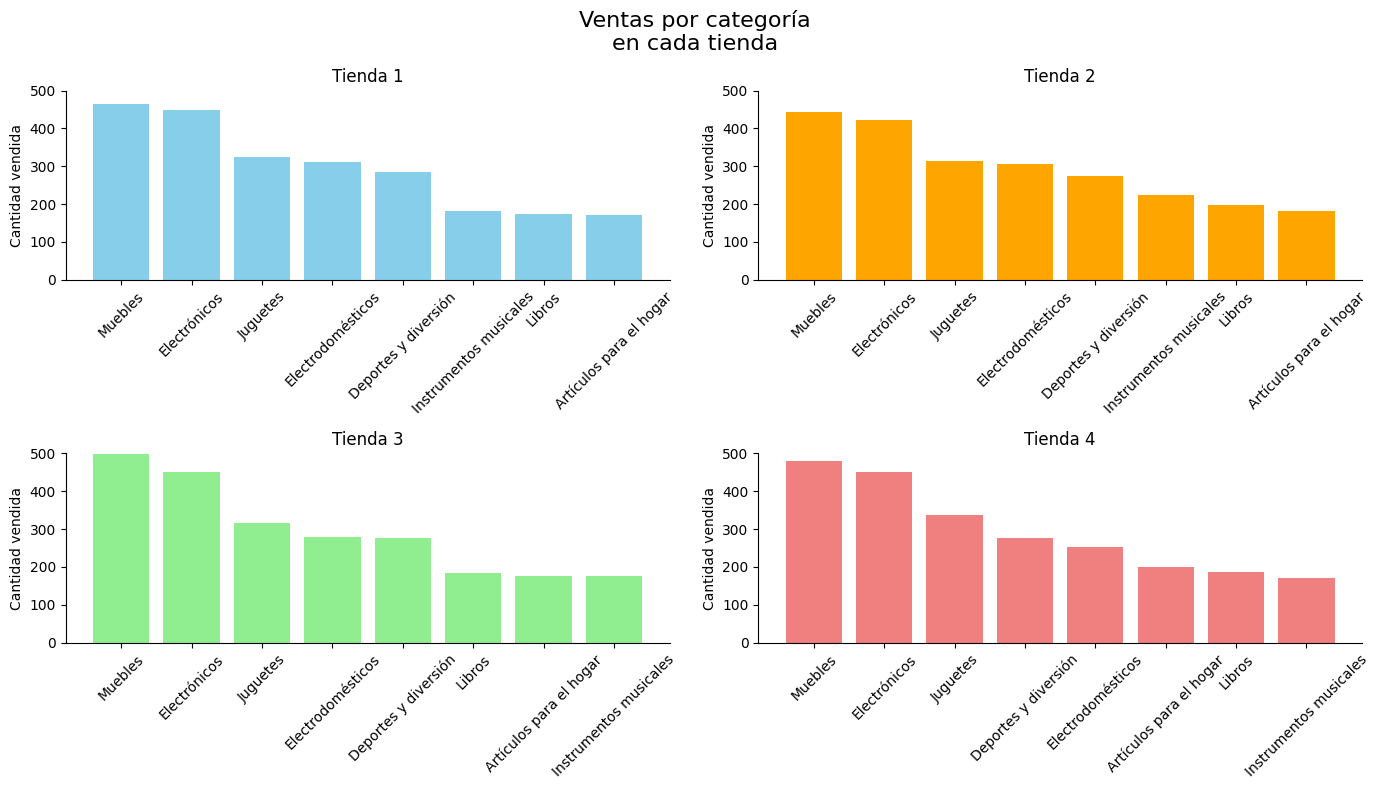

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Ventas por categoría\nen cada tienda",fontsize=16)

axs[0, 0].bar(ventas_categoria_1.index, ventas_categoria_1.values, color='skyblue')
axs[0, 0].set_title('Tienda 1')
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].bar(ventas_categoria_2.index, ventas_categoria_2.values, color='orange')
axs[0, 1].set_title('Tienda 2')
axs[0, 1].tick_params(axis='x', rotation=45)

axs[1, 0].bar(ventas_categoria_3.index, ventas_categoria_3.values, color='lightgreen')
axs[1, 0].set_title('Tienda 3')
axs[1, 0].tick_params(axis='x', rotation=45)

axs[1, 1].bar(ventas_categoria_4.index, ventas_categoria_4.values, color='lightcoral')
axs[1, 1].set_title('Tienda 4')
axs[1, 1].tick_params(axis='x', rotation=45)

for ax in axs.flat:
  ax.spines[["top","right"]].set_visible(False)
  ax.set_ylabel('Cantidad vendida')
  ax.tick_params(axis='x', rotation=45)
  ax.set_ylim(0,500)

plt.tight_layout()
plt.show()

## Costo en envío promedio por tienda

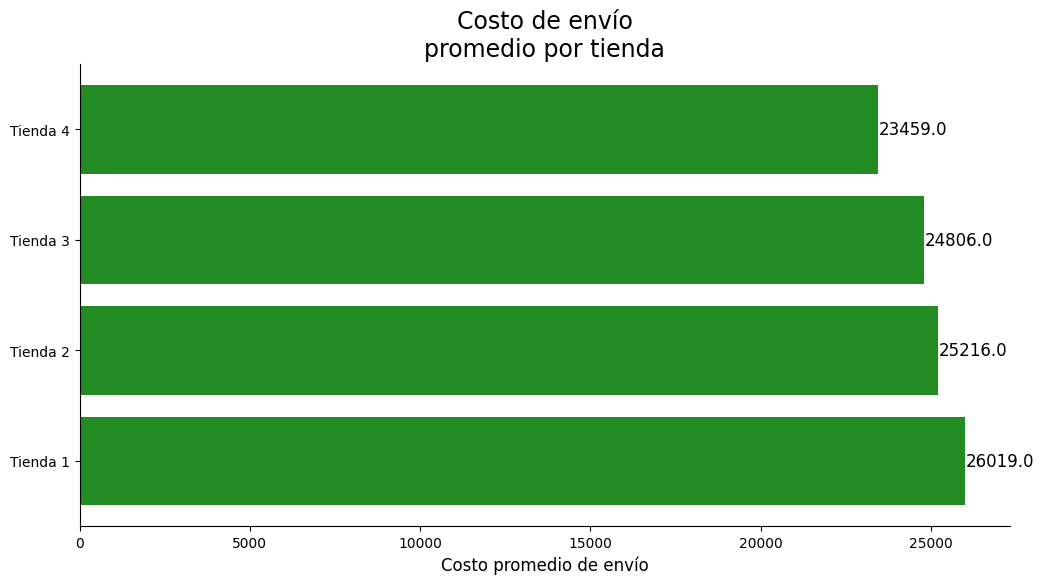

In [11]:
envios = [envios_1,envios_2,envios_3,envios_4]
envios_redondeados = [i.round() for i in envios]

fig, ax = plt.subplots(figsize=(12,6))
ax.barh(tiendas, envios_redondeados, color="forestgreen")
ax.spines[["top","right"]].set_visible(False)
ax.set_title("Costo de envío\npromedio por tienda",fontsize=17)
ax.set_xlabel("Costo promedio de envío",fontsize=12)

for i,j in enumerate(envios_redondeados):
  ax.text(j+20,i,str(j),color="black",fontsize=12,ha="left",va="center")

# **Informe final**

### Informe de Evaluación de Desempeño de Tiendas para el Sr. Juan

#### **1. Introducción**

El objetivo de este informe es evaluar el desempeño de cuatro tiendas de comercio electrónico para identificar cuál de ellas presenta el menor rendimiento. El análisis se basa en métricas clave como ingresos totales, ventas por categoría de producto, calificaciones promedio de los clientes, ventas de productos individuales y costos de envío. Al comprender las debilidades de cada tienda, podemos determinar cuál de ellas representa la opción menos atractiva.

#### **2. Análisis de Datos y Hallazgos**

A continuación, se presentan los hallazgos principales basados en los datos y gráficos proporcionados.

**Ingresos Totales por Tienda:**

El gráfico "Ingresos totales por tienda" muestra que la **Tienda 4** tiene los ingresos más bajos, por debajo de los $1,100 millones. Aunque la diferencia con las otras tiendas no es drástica, se posiciona consistentemente en último lugar en esta métrica crucial. En contraste, la Tienda 1 es la que tiene los ingresos más altos.

**Calificaciones Promedio de Clientes:**

El análisis de "Calificación promedio" revela que la **Tienda 1** tiene la calificación más baja (3.9766), lo que indica una menor satisfacción general de los clientes en comparación con las demás. La Tienda 3, con la calificación más alta (4.0483), demuestra una mayor capacidad para satisfacer a sus clientes.

**Costo de Envío Promedio:**

Según el gráfico "Costo de envío promedio por tienda", la **Tienda 4** tiene la fortaleza de contar con el costo de envío más bajo (23,459), lo que sugiere una mayor eficiencia logística. En el extremo opuesto, la **Tienda 1** registra el costo de envío promedio más alto (26,019), lo que podría afectar su rentabilidad.

**Categorías de Productos más y menos vendidas:**

* Las ventas por categoría muestran que la **Tienda 4** tiene el menor volumen de ventas en "Artículos para el hogar" e "Instrumentos musicales". Aunque se desempeña bien en "Juguetes", su rendimiento es bajo en categorías importantes.
* "Artículos para el hogar" y "Libros" son las categorías menos vendidas en la mayoría de las tiendas, pero la Tienda 4 lidera el bajo rendimiento en algunas de ellas.

**Productos más y menos vendidos:**

El análisis de productos individuales confirma un desempeño mixto:

* La **Tienda 4** muestra un bajo rendimiento en la venta de productos como "Refrigerador", "Lavadora de ropa" y "Guitarra eléctrica", que son artículos que se venden bien en otras tiendas. Por ejemplo, en "Refrigerador", vende 38 unidades mientras que la Tienda 1 vende 54.
* En contraste, la **Tienda 4** lidera la venta de algunos productos específicos como "Cama box" y "Dashboards con Power BI", lo que indica un nicho de mercado.

#### **3. Fortalezas y Debilidades de cada Tienda**

* **Tienda 1:**
    * **Fortalezas:** Lidera en ingresos totales.
    * **Debilidades:** Tiene el costo de envío promedio más alto y la calificación promedio de clientes más baja.
* **Tienda 2:**
    * **Fortalezas:** Sólidos ingresos y una alta calificación promedio de clientes.
    * **Debilidades:** No lidera en ingresos ni en la mayoría de las categorías de productos.
* **Tienda 3:**
    * **Fortalezas:** Posee la calificación promedio más alta y buen desempeño en categorías clave como "Muebles".
    * **Debilidades:** Sus ingresos son menores que los de la Tienda 1.
* **Tienda 4:**
    * **Fortalezas:** Tiene el costo de envío promedio más bajo.
    * **Debilidades:** **Presenta el peor desempeño en ingresos totales, lo que es la métrica más crítica para la salud financiera del negocio.**

#### **4. Conclusión y Justificación del Menor Desempeño**

Considerando todos los factores analizados, se concluye que la **Tienda 4** es la que presenta el menor desempeño general.

Aunque tiene el costo de envío más bajo, lo que podría indicar una operación logística eficiente, esta ventaja no se traduce en un rendimiento financiero superior. La Tienda 4 registra consistentemente **los ingresos totales más bajos**, lo que es el indicador principal del éxito y la viabilidad de un negocio. Su bajo rendimiento en categorías de productos clave y en la venta de artículos de alta demanda confirma que no tiene la misma tracción en el mercado que sus competidoras.

En resumen, mientras que la Tienda 1 lucha con la satisfacción del cliente y la Tienda 2 tiene ingresos sólidos pero no líderes, la Tienda 4 es la única que se encuentra en la posición más débil en la métrica más importante: los ingresos. Su capacidad para generar ganancias es significativamente menor que la de las demás, lo que la convierte en la opción con el desempeño más bajo del grupo.